# Pré-traitement des données

**Objectif :** 

1. Mettre les données dans un format propice au ML
    * Train / Test
    * Encodage
    * Nettoyage des NaN
2. Améliorer la performance du modèle
    * Feature selection
    * Feature engineering
    * Feature scaling
    * Suppression des outliers

Ce que l'on va faire :
1. On oublie 2 (op avancées) et on focalise sur 1 (strict minimum)
1. Dès que 1 est fait on crée un premier modèle de ML basique
1. On va l'évaluer et le diagnostiquer
1. À partir de là on est dans une boucle itérative pour améliorer les perf du modèle

![Alt text](assets/preprocessing1.png)

Boucle = Idée -> Code -> Evaluation


In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
pd.set_option("display.max_row", 111) # On sait qu'il y a 111 variables
                                        # voir Types des variables
pd.set_option("display.max_colum", 111)

In [198]:
data = pd.read_excel("./assets/prj_covid_19/kaggle_covid_19/dataset.xlsx")
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [199]:
df = data.copy()
df = df.drop(columns=["Influenza B, rapid test", "Influenza A, rapid test"])
df.head()


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Création des sous-ensembles (suite EDA)

In [200]:
missing_rate = df.isna().sum()/df.shape[0]

In [201]:
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [202]:
# Z! = list(...) 
blood_columns = list(df.columns[(missing_rate < .9) & (missing_rate>0.88)])
viral_columns = list(df.columns[(missing_rate < .88) & (missing_rate>0.75)])


## Création d'un df "lite"

In [203]:
key_columns = ["Patient age quantile", "SARS-Cov-2 exam result"]

In [204]:
# V1
# Pas dans la vidéo ?
# df = df.drop(["Influenza B, rapid test", "Influenza A, rapid test"], axis=1)
# df = df[key_columns + blood_columns + viral_columns]

# V2
# Pas dans la vidéo ?
# df = df.drop(["Influenza B, rapid test", "Influenza A, rapid test"], axis=1)
# df = df[key_columns + blood_columns]         #+ viral_columns

# V6
df = df[key_columns + blood_columns + viral_columns]


print(df.shape)
df.head()


(5644, 33)


,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


## Train Test - Nettoyage - Encodage

### Train Test

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
# Bien voir qu'on a plus X,y etc. mais df etc.
trainset, testset = train_test_split(df, test_size=.2, random_state=0)

In [207]:
# Vérifier les % de val de SARS-Cov-2 exam result dans train et test
trainset["SARS-Cov-2 exam result"].value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.900997
positive    0.099003
Name: proportion, dtype: float64

In [208]:
testset["SARS-Cov-2 exam result"].value_counts(normalize=True)


SARS-Cov-2 exam result
negative    0.901683
positive    0.098317
Name: proportion, dtype: float64

### Nettoyage

Bizarre on fait rien ?

### Encodage
* Dans l'étude des variables catégorielles (dtype="object") on avait vu 4 catégories
* On en fait un dico
* Avec map on va appliquer cet encodage à toutes les colone de type object

In [209]:
code = {"positive" : 1,
        "negative" : 0,
        "detected" : 1,
        "not_detected" : 0}

In [210]:
for col in df.select_dtypes("object"):
  df[col] = df[col].map(code)

In [211]:
# y a plus de type object
df.dtypes.value_counts()

float64    31
int64       2
Name: count, dtype: int64

In [212]:
# On fait une fonction d'encodage qu'on appliquerra au test set 
def encodage(df):
  code = {"positive" : 1,
        "negative" : 0,
        "detected" : 1,
        "not_detected" : 0}
  
  for col in df.select_dtypes("object"):
    df[col] = df[col].map(code)
  
  return df

In [213]:
# V7
def feature_engineering(df):
  # il est testé positif à au moins une autre maladie
  df['est malade'] = df[viral_columns].sum(axis=1) >= 1

  # on vire toutes les variables virales
  df = df.drop(viral_columns, axis=1)  
  return df

### Eliminer les variables manquantes

* On fait directement une fonction qui sera utilisable sur le train set et le test set
* En version 1 elle fait juste dropna 
* C'est sans doute excessif. On améliorera plus tard

In [214]:
# V1
# def imputation(df):
#   return df.dropna(axis=0)

# V2
# on remplace les NaN avec une valeur extreme
# def imputation(df):
#   return df.fillna(-999)

# V3
# def imputation(df):
#   # on prend une variable virale au pif "Parainfuenza 3"
#   # et une autre de type blood au pif aussi
#   df["is_na"] = df["Parainfluenza 3"].isna() | df["Leukocytes"].isna()
#   df = df.fillna(-999)

# V4
def imputation(df):
  df = df.dropna(axis=0)
  return df



In [215]:
def preprocessing(df):
  df = encodage(df)
  #V7
  df = feature_engineering(df)
  df = imputation(df)

  X = df.drop("SARS-Cov-2 exam result", axis=1)
  y = df["SARS-Cov-2 exam result"]
  print(y.value_counts())

  return X, y

In [216]:
X_train, y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


In [217]:
X_test, y_test = preprocessing(testset)


SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64


* On vient de terminer la version la plus simple du pre-processing
* Le dataset est prêt on peut entrainer un modèle

Les arbres de décision sont très rapides, facile à comprendre ce qui facilite le diag.

## Modelisation

In [238]:
from sklearn.tree import DecisionTreeClassifier
#V6
from sklearn.ensemble import RandomForestClassifier
#V8
from sklearn.pipeline import make_pipeline
# f_classif pour test anova
from sklearn.feature_selection import SelectKBest, f_classif

#V10
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [239]:
#model = DecisionTreeClassifier(random_state=0)

# V6
# À ce stade, one ne règle pas les paramètres du modèle
# On ajuste de dataset pour qu'il donne de bon résultat sur un modèle brut de fonderie
#model = RandomForestClassifier(random_state=0)

# # V8
# model = make_pipeline(SelectKBest(f_classif, k=10), # on gardera les 10 meilleurs variables
#                       RandomForestClassifier(random_state=0))


# V9
# model = make_pipeline(SelectKBest(f_classif, k=5), # on gardera les 10 meilleurs variables
                      # RandomForestClassifier(random_state=0))

# V10
model = make_pipeline(PolynomialFeatures(2),  # ca va élever au carré chaque features
                                              # et de multiplier chaque variable avec ses voisines
                      SelectKBest(f_classif, k=10), # on gardera que les 10 variables qui ont le score Anove le + élevé
                      RandomForestClassifier(random_state=0))


## Procédure d'évaluation
Elle doit être 
* robuste
* claire
* informative

On va utiliser la métrique F1. Elle fait le rapport entre la précision et la sensibilité. 

In [220]:
from sklearn.metrics import f1_score, confusion_matrix,classification_report

# permet de savoir si on est en over ou under fitting
# permettra de prendre des décision
# voir 21 - scikit-learn_Model_Selection.ipynb
from sklearn.model_selection import learning_curve 

In [221]:
def evaluation(model):
  model.fit(X_train, y_train)
  ypred = model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))

  # V2
  # val_score = score de validation
  # learning_curve utilise la validation croisée pour entrainer et evaluer le modèle
  # sur plusieur splits de notre dataset
  # cv=4 => ???? TO DO
  # en découpant le train_size de 0.1 à 1 en 10 découpes
  # scoring = "f1" car le score f1 c'est le rapport entre precision et recall
  # permet de comprendre si le modèle arrive à bien identifier les cas positifs et les cas négatifs
  # relire 21 - scikit-learn_Model_Selection.ipynb
  N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring = "f1" ,train_sizes=np.linspace (0.1, 1, 10))
  plt.figure(figsize=(12,8))
  plt.plot(N, train_score.mean(axis=1), label="train score")
  plt.plot(N, val_score.mean(axis=1), label="validation score")
  plt.legend()

c:\Users\phili\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\phili\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



c:\Users\phili\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\phili\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\phili\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\phili\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\phili\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\

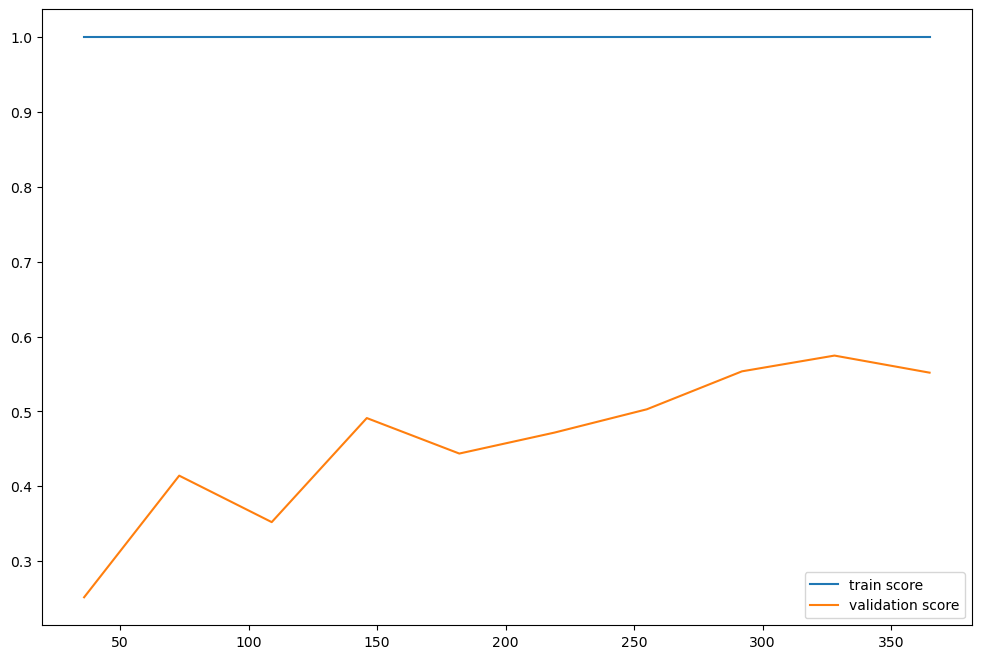

In [240]:
# on test notre model
evaluation (model)

## V1
* Sur 54 (bout de ligne) cas négatifs (0 en début de ligne)
    * 52 on été correctement identifiés (matrice du haut)
    * on a fait 2 faux positifs. ligne 0 col 1 matrice du haut 
* sur 12 detectés positifs
    * 2 cas positif ont correctement été identifiés (=> recall de 17%)
    * 10 n'ont pas été détectés

On ne détecte que 17% des cas... Y a un peu de boulot.    

* Sur le graphe on voit que le modèle est en over fitting
* Car le modèle est à 100% sur le train set mais il est incapable de généraliser sur de nouveaux cas
* En effet avec les données du validation set on obtient une performance f1 d'au mieux 50% (ce qui n'est pas terrible)

Overfitting => Modifier le dataset pour lutter contre l'over fitting. 
* Fournir plus de données à la machine

Du coup on va modifier la fonction inputation() pour éviter le dropna() un peu violent



![Alt text](assets/preprocessing1.png)

## V2 de imputation
* Si dans imputation on rempli avec -999 les graphe de evaluation(model) montre que le f1 score passe de 100 à 30%
* Bref c'est pire
* Avoir plus de donner pour combattre overfitting c'est bien mais on peut pas remplir avec n'importe quoi.

## V3 de imputation
On peut tenter autre chose
* On laisse le fillna
* On rajoute une variable qui nous indique la présence de valeurs manquantes
* cf 26 - scikit-learn_Imputer.ipynb
* Voir MissingIndicator()
* Ca va peut être pas marcher...mais avec evaluation (model) on a ce qu'il faut pour rapidement évaluer telle ou telle idée
* => v3 de imputation puis ré évaluation du modèle
* Marche pas trop
* Bref fillna() marche pas.

## V4 de imputation
* contre l'over fitting on peut utiliser la selection de variable


## V5 Utiliser l'attribut feature_importance
* On est revenu à la première version de imputation()
* feature_importance indique quelles sont les variables les plus importantes dans la découpe de l'arbre de décision



In [223]:
model.feature_importances_


array([0.04418059, 0.04977197, 0.03985046, 0.112081  , 0.04038935,
       0.04999276, 0.05181301, 0.04494368, 0.21047229, 0.02778253,
       0.03854845, 0.07104398, 0.03950262, 0.08197711, 0.04390353,
       0.05374666])

On va injecter le tableau précédent dans un dataframe dans lequel, pour chauqe valeur on aura la colonne associée.


In [224]:
pd.DataFrame(model.feature_importances_, index=X_train.columns)

,0
Patient age quantile,0.044181
Hematocrit,0.049772
Hemoglobin,0.039850
Platelets,0.112081
Mean platelet volume,0.040389
Red blood Cells,0.049993
Lymphocytes,0.051813
Mean corpuscular hemoglobin concentration (MCHC),0.044944
Leukocytes,0.210472
Basophils,0.027783


<Axes: >

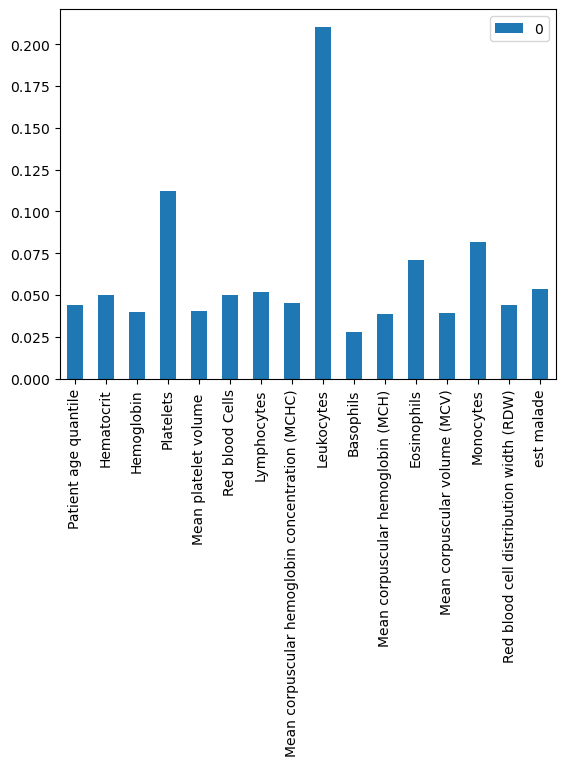

In [225]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar()

* Du coup on retrouve les variables les plus importante pour l'arbre de décision.
* Pour le modèle, ce qui compte ce sont les variables de type sang
* La majorité des données virales n'ont pas d'importance
* Ca vaudrait le coup de virer les données virale
* Ca pourrait être valable de faire un dropna QUE sur les données de type sang (on néglige les données virales)
* Quand on fait ça 
    * Modif de la façon de créer le df sans les données virales
    * Cela n'apporte rien. La route eval(model) donne la même chose 
    * On a toujours un soucis d'over fitting

## V6 
* Nouvelle idée 
* Utiliser un modèle régularisé
* Il lutte contre l'over fitting
* Utiliser une random forest


## V7
* Utiliser un treshold
* Mais, on se rappelle qu'on avait créé une variable "est_malade" lors de l'EDA
* Voir le sous ensemble malade_df = df[df["est malade"] == True]
* On voyait des diff significative dans les tests sanguin
* On ne voyait pas de telles diff sur les patients atteints du covid
* Faut tester si créer une variables est_malade paut aider


## V8
* La performance ne s'améliore pas
* La courbe du validation score monte mais bon c'est toujours pas ça
* Dans le graphique feature_importances_ y a toujours pas mal de variable sans impact (inf 5% par exemple)  
* On pourrait mettre un treshold avec le selector select from model
* Relire 27 - scikit-learn_Features_Selection.ipynb
* On pourrait aussi utiliser le selector SelectKBest qui utilise un test statistique pour faire sa sélection 
* à aussi relire 27 - scikit-learn_Features_Selection.ipynb
* on pourrait utiliser un test anova

## V9

* Diminuer le nb de variables à retenir
* passer à 5 dans model = make_pipeline...


## V10

* Avec 5 c'est mieux.
* On est passé de 111 variables à 5...
* On a 44% de bonne réponses (recall, 1) = 0.44 et que sur 16 individus
* f1 passe à 50%
* Un test avec k=4
* On revient à 5
* On va faire une expansion polynomiale pour créer plein de variables suivit d'un PCA
* On remet k à 10 car il y a beaucoup de variables générées. Voir commentaire dans V10 make_pipeline
* Quand on entraine le modèle on est sur la bonne piste
* Dans la prochaine étape
    * on intègre tout ça dans la boucle de preprocessing
    * on optimisera avec un gridsearchcv  


## Note
* On a pas fait de normalisation car c'est pas nécessaire avec les arbres
* Le travail fait a été justifié 
* On a testé l'idée
* Ensuite on a accepté ou rejeté
* Trop souvent sur kaggle y a des pavé de preprocessing complètement non justifié
